# 1. Import dependencies

In [1]:
import requests
import base64
from IPython import display
import os

## 2. Post Image

### 2.1 Set image path

In [2]:
# Enter the path to the selected image
image_path = "/Users/miguelgranica/Downloads/med_beer.jpg"
#image_path = "/Users/miguelgranica/Documents/MBIT - DE/Modulo 02 - Arquitecturas transaccionales/M02 S05 Proyecto de Consolidacion/static/images/cat_modern.jpg"

In [3]:
# extract filename from path
image_name = os.path.splitext(os.path.basename(image_path))[0]

### 2.2 Encode Image

In [4]:
def encode_image(image_path):
    with open(image_path, mode="rb") as img:
        img_b64 = base64.b64encode(img.read())
    return img_b64

In [5]:
img_b64 = encode_image(image_path)

### 2.3 Post method

#### 2.3.1 Correct request 

In [6]:
res = requests.post(
    "http://localhost:5005/images?min_confidence=75",
    json={"data":img_b64},
)
res

<Response [200]>

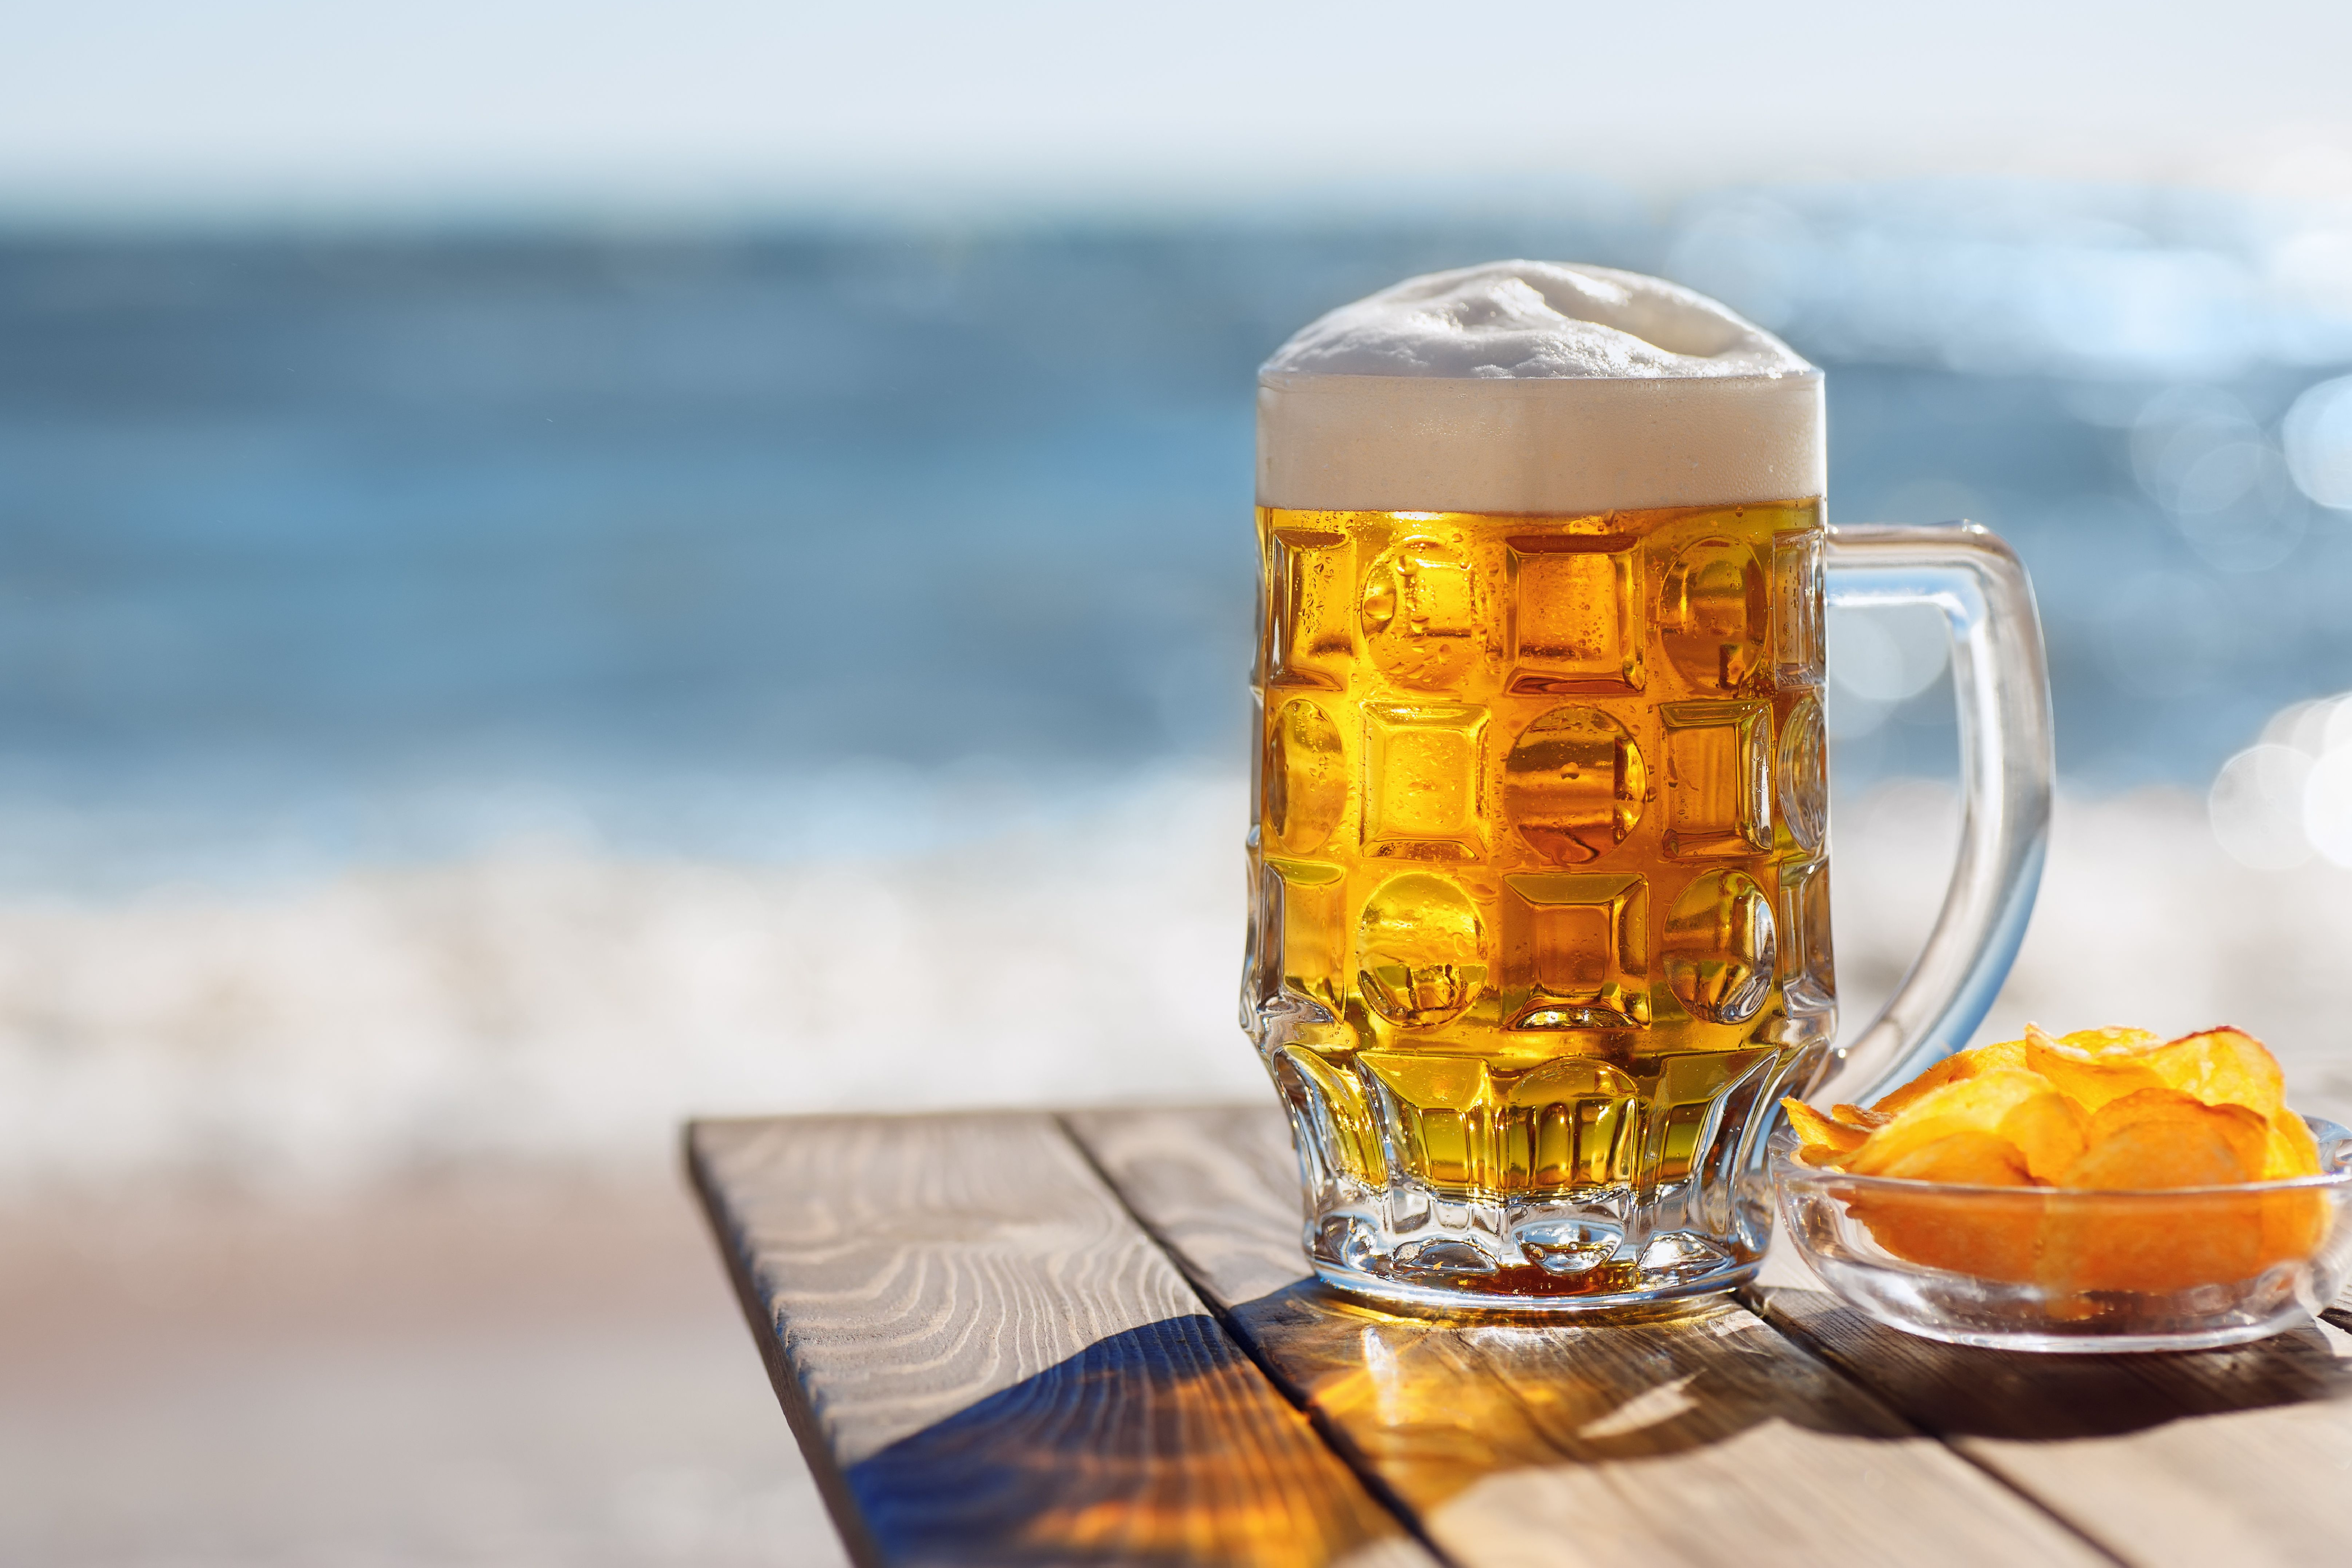

In [7]:
b64str = res.json()["data"]
img = base64.b64decode(b64str)
display.Image(img)

#### 2.3.2 Herror Handling

In [8]:
# min confidence error handling
res = requests.post(
    "http://localhost:5005/images?min_confidence=150",
    json={"data":img_b64},
)
res

<Response [400]>

In [9]:
res.json()

{'error': "'min_confidence' must be a valid integer between 0 and 100"}

In [10]:
res = requests.post(
    "http://localhost:5005/images?min_confidence=75",
    json={},
)
res

<Response [400]>

In [11]:
res.json()

{'error': "Missing 'data' parameter in the request body"}

## 3 Get Images 

### 3.1 Correct request

In [12]:
#Params definitions
min_date = '2023-12-27 18:45:59'
max_date = '2024-01-05 18:45:59'
tags = "architecture,palace"


In [13]:
res = requests.get(
    f"http://localhost:5005/images?min_date={min_date}&max_date={max_date}&tags={tags}",
)
res

<Response [200]>

In [14]:
res.json()

[{'date': '2023-12-27 20:09:51.595350',
  'id': '658c768088c257da3396084a',
  'size': 260284,
  'tags': {'confidences': '98,77', 'tags': 'architecture,palace'}},
 {'date': '2023-12-29 20:57:43.592105',
  'id': '658f24b888c257da3335e5b7',
  'size': 260284,
  'tags': {'confidences': '98,77', 'tags': 'architecture,palace'}}]

### 3.2 Error Handling

In [15]:
#Params definitions
min_date = '2023-12-27 18:45:59'
max_date = '2024-01-05 18:45:59'
tags = "python"

In [16]:
res = requests.get(
    f"http://localhost:5005/images?min_date={min_date}&max_date={max_date}&tags={tags}",
)
res

<Response [400]>

In [17]:
res.json()

{'error': "Query images Error: No Images were collected with the tags: ['python']"}

## 4 Get Image

### 4.1 Correct request

In [18]:
res = requests.get(
    f"http://localhost:5005/images/658c768088c257da3396084a",
)
res

<Response [200]>

In [19]:
res.json()

[{'date': '2023-12-27 20:09:51.595350',
  'id': '658c768088c257da3396084a',
  'size': 260284,
  'tags': {'confidences': '98,77', 'tags': 'architecture,palace'}}]

### 4.2 Error Handling 

In [20]:
res = requests.get(
    f"http://localhost:5005/images/658c768088c2",
)
res

<Response [200]>

In [21]:
res.json()

[{'date': None,
  'id': None,
  'size': None,
  'tags': {'confidences': None, 'tags': None}}]

## 5 Get tags

### 5.1 Correct request

In [22]:
min_date = '2023-12-27 18:45:59'
max_date = '2023-12-29 18:45:59'

In [23]:
res = requests.get(
    f"http://localhost:5005/tags?min_date={min_date}&max_date={max_date}",
)
res

<Response [200]>

In [24]:
res.json()

[{'max_confidence': 98,
  'mean_confidence': '98.0000',
  'min_confidence': 98,
  'n_images': 1,
  'tag': 'architecture'},
 {'max_confidence': 77,
  'mean_confidence': '77.0000',
  'min_confidence': 77,
  'n_images': 1,
  'tag': 'palace'}]

### 5.2 Error Handling

In [25]:
min_date = '2023-12-26 07:45:59'
max_date = '2023-12-27 07:45:59'

In [26]:
res = requests.get(
    f"http://localhost:5005/tags?min_date={min_date}&max_date={max_date}",
)
res

<Response [400]>

In [27]:
res.json()

{'error': 'Query tags Error: No tags were generated within those dates'}